In [1]:
import sqlite3
import sqlalchemy as db
from sqlalchemy.orm import Session
import matplotlib as plt
from collections import Counter
import operator

import matplotlib.pyplot as plt

In [2]:
engine = db.create_engine('sqlite:///flights.sqlite3', echo=True)     #relative directory (in same folder as this notebook so no directory)
connection = engine.connect()
flights = db.Table('ontime', db.MetaData(), autoload=True, autoload_with=engine)
session = Session(bind=engine)
cols = flights.columns

2019-11-26 16:41:45,020 INFO sqlalchemy.engine.base.Engine SELECT CAST('test plain returns' AS VARCHAR(60)) AS anon_1
2019-11-26 16:41:45,020 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,021 INFO sqlalchemy.engine.base.Engine SELECT CAST('test unicode returns' AS VARCHAR(60)) AS anon_1
2019-11-26 16:41:45,023 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,026 INFO sqlalchemy.engine.base.Engine PRAGMA table_info("ontime")
2019-11-26 16:41:45,027 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,030 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SELECT * FROM sqlite_master UNION ALL   SELECT * FROM sqlite_temp_master) WHERE name = 'ontime' AND type = 'table'
2019-11-26 16:41:45,031 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,041 INFO sqlalchemy.engine.base.Engine PRAGMA foreign_key_list("ontime")
2019-11-26 16:41:45,043 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,044 INFO sqlalchemy.engine.base.Engine SELECT sql FROM  (SEL

In [3]:
insp = db.engine.reflection.Inspector.from_engine(engine)
for name in insp.get_table_names():
    for index in insp.get_indexes(name):
        print(index)

2019-11-26 16:41:45,117 INFO sqlalchemy.engine.base.Engine SELECT name FROM sqlite_master WHERE type='table' ORDER BY name
2019-11-26 16:41:45,119 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,125 INFO sqlalchemy.engine.base.Engine PRAGMA index_list("ontime")
2019-11-26 16:41:45,128 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,132 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("dest")
2019-11-26 16:41:45,136 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,137 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("origin")
2019-11-26 16:41:45,139 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,141 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("date")
2019-11-26 16:41:45,143 INFO sqlalchemy.engine.base.Engine ()
2019-11-26 16:41:45,145 INFO sqlalchemy.engine.base.Engine PRAGMA index_info("year")
2019-11-26 16:41:45,146 INFO sqlalchemy.engine.base.Engine ()
{'name': 'dest', 'column_names': ['Dest'], 'unique': 0}
{'name': 'origin', '

In [4]:
def daily_delays_and_flights08(timeDelay): 
    total_flights = []
    total_delays = []
    for month in range(1, 13):
        if month == 1 or month == 3 or month == 5 or month == 7 or month == 8 or month == 10 or month == 12:
            for day in range(1, 32):
                total_delays.append(int(session.query(db.func.count(flights)).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
                total_flights.append(int(session.query(db.func.count(flights)).filter(cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
        elif month == 4 or month == 6 or month == 9 or month == 11:
            for day in range(1, 31):
                total_delays.append(int(session.query(db.func.count(flights)).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
                total_flights.append(int(session.query(db.func.count(flights)).filter(cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
        elif month == 2:
            for day in range(1, 30):
                total_delays.append(int(session.query(db.func.count(flights)).filter(cols.ArrDelay.cast(db.Integer) >= timeDelay, cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
                total_flights.append(int(session.query(db.func.count(flights)).filter(cols.DayofMonth.cast(db.Integer) == day, cols.Month.cast(db.Integer) == month, cols.Year.cast(db.Integer) == 2008).scalar()))
    return total_delays, total_flights



In [5]:
x_1, y_1 = daily_delays_and_flights08(60)

2019-11-26 16:41:45,176 INFO sqlalchemy.engine.base.Engine BEGIN (implicit)
2019-11-26 16:41:45,177 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:41:45,178 INFO sqlalchemy.engine.base.Engine (60, 1, 1, 2008)
2019-11-26 16:42:07,956 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:42:07,959 INFO sqlalchemy.engine.base.Engine (1, 1, 2008)
2019-11-26 16:42:14,547 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16

2019-11-26 16:48:00,158 INFO sqlalchemy.engine.base.Engine (13, 1, 2008)
2019-11-26 16:48:06,415 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:48:06,416 INFO sqlalchemy.engine.base.Engine (60, 14, 1, 2008)
2019-11-26 16:48:30,146 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:48:30,146 INFO sqlalchemy.engine.base.Engine (14, 1, 2008)
2019-11-26 16:48:36,356 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:

2019-11-26 16:54:12,090 INFO sqlalchemy.engine.base.Engine (26, 1, 2008)
2019-11-26 16:54:18,491 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:54:18,491 INFO sqlalchemy.engine.base.Engine (60, 27, 1, 2008)
2019-11-26 16:54:40,942 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:54:40,943 INFO sqlalchemy.engine.base.Engine (27, 1, 2008)
2019-11-26 16:54:47,325 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 16:

2019-11-26 17:00:19,896 INFO sqlalchemy.engine.base.Engine (8, 2, 2008)
2019-11-26 17:00:26,333 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:00:26,334 INFO sqlalchemy.engine.base.Engine (60, 9, 2, 2008)
2019-11-26 17:00:48,748 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:00:48,749 INFO sqlalchemy.engine.base.Engine (9, 2, 2008)
2019-11-26 17:00:55,103 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:00:

2019-11-26 17:06:22,297 INFO sqlalchemy.engine.base.Engine (21, 2, 2008)
2019-11-26 17:06:28,366 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:06:28,367 INFO sqlalchemy.engine.base.Engine (60, 22, 2, 2008)
2019-11-26 17:06:49,844 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:06:49,844 INFO sqlalchemy.engine.base.Engine (22, 2, 2008)
2019-11-26 17:06:55,944 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:12:32,460 INFO sqlalchemy.engine.base.Engine (5, 3, 2008)
2019-11-26 17:12:39,170 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:12:39,172 INFO sqlalchemy.engine.base.Engine (60, 6, 3, 2008)
2019-11-26 17:13:01,252 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:13:01,253 INFO sqlalchemy.engine.base.Engine (6, 3, 2008)
2019-11-26 17:13:07,415 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:13:

2019-11-26 17:18:51,712 INFO sqlalchemy.engine.base.Engine (18, 3, 2008)
2019-11-26 17:18:58,401 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:18:58,401 INFO sqlalchemy.engine.base.Engine (60, 19, 3, 2008)
2019-11-26 17:19:21,666 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:19:21,667 INFO sqlalchemy.engine.base.Engine (19, 3, 2008)
2019-11-26 17:19:28,323 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:24:58,218 INFO sqlalchemy.engine.base.Engine (31, 3, 2008)
2019-11-26 17:25:04,503 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:25:04,504 INFO sqlalchemy.engine.base.Engine (60, 1, 4, 2008)
2019-11-26 17:25:25,634 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:25:25,634 INFO sqlalchemy.engine.base.Engine (1, 4, 2008)
2019-11-26 17:25:34,381 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:25

2019-11-26 17:31:10,620 INFO sqlalchemy.engine.base.Engine (13, 4, 2008)
2019-11-26 17:31:16,790 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:31:16,790 INFO sqlalchemy.engine.base.Engine (60, 14, 4, 2008)
2019-11-26 17:31:39,104 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:31:39,105 INFO sqlalchemy.engine.base.Engine (14, 4, 2008)
2019-11-26 17:31:45,440 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:37:22,327 INFO sqlalchemy.engine.base.Engine (26, 4, 2008)
2019-11-26 17:37:28,344 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:37:28,345 INFO sqlalchemy.engine.base.Engine (60, 27, 4, 2008)
2019-11-26 17:37:49,952 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:37:49,952 INFO sqlalchemy.engine.base.Engine (27, 4, 2008)
2019-11-26 17:37:56,350 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:43:31,354 INFO sqlalchemy.engine.base.Engine (9, 5, 2008)
2019-11-26 17:43:37,660 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:43:37,661 INFO sqlalchemy.engine.base.Engine (60, 10, 5, 2008)
2019-11-26 17:44:00,614 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:44:00,615 INFO sqlalchemy.engine.base.Engine (10, 5, 2008)
2019-11-26 17:44:06,782 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:4

2019-11-26 17:49:57,493 INFO sqlalchemy.engine.base.Engine (22, 5, 2008)
2019-11-26 17:50:04,157 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:50:04,158 INFO sqlalchemy.engine.base.Engine (60, 23, 5, 2008)
2019-11-26 17:50:28,817 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:50:28,818 INFO sqlalchemy.engine.base.Engine (23, 5, 2008)
2019-11-26 17:50:35,689 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:

2019-11-26 17:56:29,253 INFO sqlalchemy.engine.base.Engine (4, 6, 2008)
2019-11-26 17:56:35,895 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:56:35,896 INFO sqlalchemy.engine.base.Engine (60, 5, 6, 2008)
2019-11-26 17:57:00,884 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:57:00,885 INFO sqlalchemy.engine.base.Engine (5, 6, 2008)
2019-11-26 17:57:07,556 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 17:57:

2019-11-26 18:02:54,712 INFO sqlalchemy.engine.base.Engine (17, 6, 2008)
2019-11-26 18:03:00,903 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:03:00,904 INFO sqlalchemy.engine.base.Engine (60, 18, 6, 2008)
2019-11-26 18:03:22,938 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:03:22,939 INFO sqlalchemy.engine.base.Engine (18, 6, 2008)
2019-11-26 18:03:29,310 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:09:25,390 INFO sqlalchemy.engine.base.Engine (30, 6, 2008)
2019-11-26 18:09:31,646 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:09:31,647 INFO sqlalchemy.engine.base.Engine (60, 1, 7, 2008)
2019-11-26 18:09:53,225 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:09:53,226 INFO sqlalchemy.engine.base.Engine (1, 7, 2008)
2019-11-26 18:09:59,668 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:09

2019-11-26 18:15:38,221 INFO sqlalchemy.engine.base.Engine (13, 7, 2008)
2019-11-26 18:15:44,733 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:15:44,733 INFO sqlalchemy.engine.base.Engine (60, 14, 7, 2008)
2019-11-26 18:16:06,474 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:16:06,475 INFO sqlalchemy.engine.base.Engine (14, 7, 2008)
2019-11-26 18:16:13,076 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:21:48,902 INFO sqlalchemy.engine.base.Engine (26, 7, 2008)
2019-11-26 18:21:54,585 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:21:54,586 INFO sqlalchemy.engine.base.Engine (60, 27, 7, 2008)
2019-11-26 18:22:14,585 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:22:14,586 INFO sqlalchemy.engine.base.Engine (27, 7, 2008)
2019-11-26 18:22:20,259 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:28:00,536 INFO sqlalchemy.engine.base.Engine (8, 8, 2008)
2019-11-26 18:28:06,597 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:28:06,597 INFO sqlalchemy.engine.base.Engine (60, 9, 8, 2008)
2019-11-26 18:28:28,055 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:28:28,057 INFO sqlalchemy.engine.base.Engine (9, 8, 2008)
2019-11-26 18:28:34,172 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:28:

2019-11-26 18:34:22,592 INFO sqlalchemy.engine.base.Engine (21, 8, 2008)
2019-11-26 18:34:28,498 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:34:28,498 INFO sqlalchemy.engine.base.Engine (60, 22, 8, 2008)
2019-11-26 18:34:50,374 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:34:50,375 INFO sqlalchemy.engine.base.Engine (22, 8, 2008)
2019-11-26 18:34:56,623 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:40:44,083 INFO sqlalchemy.engine.base.Engine (3, 9, 2008)
2019-11-26 18:40:50,300 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:40:50,301 INFO sqlalchemy.engine.base.Engine (60, 4, 9, 2008)
2019-11-26 18:41:13,640 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:41:13,641 INFO sqlalchemy.engine.base.Engine (4, 9, 2008)
2019-11-26 18:41:20,026 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:41:

2019-11-26 18:47:36,277 INFO sqlalchemy.engine.base.Engine (16, 9, 2008)
2019-11-26 18:47:43,514 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:47:43,515 INFO sqlalchemy.engine.base.Engine (60, 17, 9, 2008)
2019-11-26 18:48:10,100 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:48:10,101 INFO sqlalchemy.engine.base.Engine (17, 9, 2008)
2019-11-26 18:48:16,535 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 18:54:24,388 INFO sqlalchemy.engine.base.Engine (29, 9, 2008)
2019-11-26 18:54:30,821 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:54:30,822 INFO sqlalchemy.engine.base.Engine (60, 30, 9, 2008)
2019-11-26 18:54:54,864 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:54:54,864 INFO sqlalchemy.engine.base.Engine (30, 9, 2008)
2019-11-26 18:55:01,175 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 18:

2019-11-26 19:00:57,174 INFO sqlalchemy.engine.base.Engine (12, 10, 2008)
2019-11-26 19:01:03,449 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:01:03,449 INFO sqlalchemy.engine.base.Engine (60, 13, 10, 2008)
2019-11-26 19:01:26,801 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:01:26,801 INFO sqlalchemy.engine.base.Engine (13, 10, 2008)
2019-11-26 19:01:32,925 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:18:37,170 INFO sqlalchemy.engine.base.Engine (25, 10, 2008)
2019-11-26 19:18:43,468 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:18:43,468 INFO sqlalchemy.engine.base.Engine (60, 26, 10, 2008)
2019-11-26 19:19:06,427 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:19:06,428 INFO sqlalchemy.engine.base.Engine (26, 10, 2008)
2019-11-26 19:19:12,607 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:25:03,892 INFO sqlalchemy.engine.base.Engine (7, 11, 2008)
2019-11-26 19:25:10,426 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:25:10,427 INFO sqlalchemy.engine.base.Engine (60, 8, 11, 2008)
2019-11-26 19:25:33,425 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:25:33,426 INFO sqlalchemy.engine.base.Engine (8, 11, 2008)
2019-11-26 19:25:39,892 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:

2019-11-26 19:31:30,163 INFO sqlalchemy.engine.base.Engine (20, 11, 2008)
2019-11-26 19:31:36,204 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:31:36,204 INFO sqlalchemy.engine.base.Engine (60, 21, 11, 2008)
2019-11-26 19:31:59,337 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:31:59,338 INFO sqlalchemy.engine.base.Engine (21, 11, 2008)
2019-11-26 19:32:05,750 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:38:05,584 INFO sqlalchemy.engine.base.Engine (3, 12, 2008)
2019-11-26 19:38:12,438 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:38:12,439 INFO sqlalchemy.engine.base.Engine (60, 4, 12, 2008)
2019-11-26 19:38:35,682 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:38:35,683 INFO sqlalchemy.engine.base.Engine (4, 12, 2008)
2019-11-26 19:38:41,915 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:

2019-11-26 19:44:49,506 INFO sqlalchemy.engine.base.Engine (16, 12, 2008)
2019-11-26 19:44:56,850 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:44:56,850 INFO sqlalchemy.engine.base.Engine (60, 17, 12, 2008)
2019-11-26 19:45:20,951 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:45:20,952 INFO sqlalchemy.engine.base.Engine (17, 12, 2008)
2019-11-26 19:45:27,553 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

2019-11-26 19:51:04,156 INFO sqlalchemy.engine.base.Engine (29, 12, 2008)
2019-11-26 19:51:10,349 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:51:10,350 INFO sqlalchemy.engine.base.Engine (60, 30, 12, 2008)
2019-11-26 19:51:35,715 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 19:51:35,715 INFO sqlalchemy.engine.base.Engine (30, 12, 2008)
2019-11-26 19:51:42,142 INFO sqlalchemy.engine.base.Engine SELECT count() AS count_1 
FROM ontime 
WHERE CAST(ontime."ArrDelay" AS INTEGER) >= ? AND CAST(ontime."DayofMonth" AS INTEGER) = ? AND CAST(ontime."Month" AS INTEGER) = ? AND CAST(ontime."Year" AS INTEGER) = ?
2019-11-26 

### Plot total flights vs. total delays (per day)

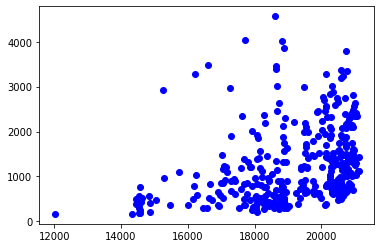

In [34]:
plt.scatter(y_1, x_1, color='b')
plt.show()

In [24]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

In [25]:
x = np.array(y_1)
y = np.array(x_1)

In [27]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [47]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [48]:
y_pred = regressor.predict(X_test)

### Regression model

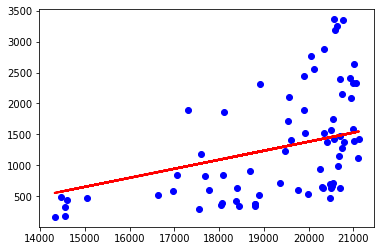

In [49]:
plt.scatter(X_test, y_test,  color='b')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [50]:
r2 = metrics.r2_score(y_test, y_pred)

In [51]:
r2

0.2311191185755075

### Compare delays in average week to holiday weeks
#### (weeks are calculated Monday - Sunday, with exception of first and last week)

In [85]:
#calculate delays in average week
#week0
week_total = 0
avgs = []
dayofyear=0
for day in range(6):
    week_total += x_1[day]
    dayofyear += 1
year_total = week_total
avgs.append(week_total/6)
#weeks1 to 50
print(dayofyear)
for _ in range(51):
    week_total = 0
    for day in range(dayofyear, dayofyear+7):
        week_total += x_1[day]
        dayofyear += 1
    year_total += week_total
    avgs.append(week_total/7)
print(dayofyear)
#week 51
week_total = 0
for day in range(363, 366):
    week_total += x_1[day]

avgs.append(week_total/3)

6
363


In [93]:
double_check = avgs[0]*6
for week in range(1, 52):
    double_check += avgs[week]*7
double_check += avgs[52]*3

In [94]:
sum(x_1) == double_check

True

In [96]:
avg_week = np.mean(avgs)
avg_week

1259.1585804132974

In [132]:
xs = ["Jan. 1-6", "7-13", "14-20", "21-27", "Jan. 28 - Feb. 3", "4-10", "11-17", "18-24", "Feb. 25 - Mar. 2", "3-9", "10-16", "17-23", "24-30", "Mar. 31 - Apr. 6", "7-13", "14-20", "21-27", "Apr. 28 - May 4", "5-11", "12-18", "19-25", "May 26 - June 1", "2-8", "9-15", "16-22", "23-29", "June 30 - July 6", "7-13", "14-20", "21-27", "July 28 - Aug. 3", "4-10", "11-17", "18-24", "25-31", "Sept. 1 - 7", "8-14", "15-21", "22-28", "Sept. 29 - Oct. 5", "6-12", "13-19", "20-26", "Oct. 27 - Nov. 2", "3-9", "10-16", "17-23", "24-30", "Dec. 1 - 7", "8-14", "15-21", "22-28", "29-31"]

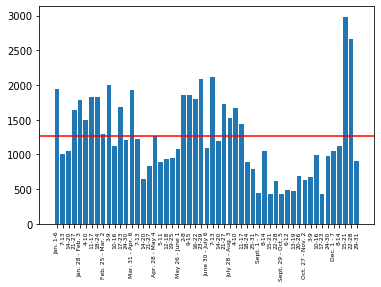

In [143]:
plt.bar(range(len(avgs)), avgs, width=0.8)
plt.xticks(range(len(xs)), xs, rotation=90, fontsize=6)
plt.axhline(y=avg_week, color='r', linestyle='-')
plt.show()